![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

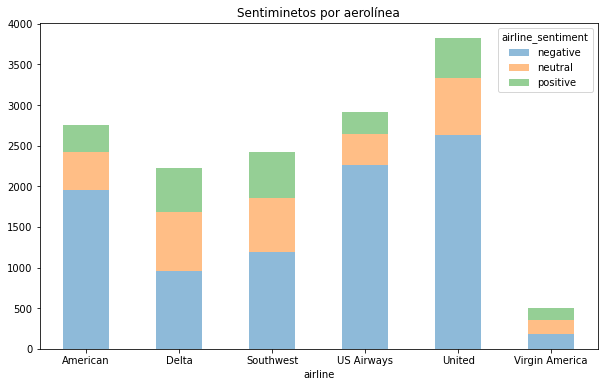

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
import re

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1

# preprocesamiento de datos
vectorizer = CountVectorizer( max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=1)
model.fit(X_train_vectorized, y_train)
y_train_pred = model.predict(X_train_vectorized)
train_accuracy_cv = accuracy_score(y_train, y_train_pred)
#métricas
y_test_pred = model.predict(X_test_vectorized)
test_accuracy_cv = accuracy_score(y_test, y_test_pred)

print("La precisión del modelo en el conjunto de entrenamiento es:", train_accuracy_cv)
print("La precisión del modelo en el conjunto de prueba es:", test_accuracy_cv)

La precisión del modelo en el conjunto de entrenamiento es: 0.6914763458401305
La precisión del modelo en el conjunto de prueba es: 0.6841887417218543


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 2

# lista de stopwords en inglés, excluyendo palabras que se consideran importantes en nuestro problema
stopwords_english = set(nltk.corpus.stopwords.words('english')) - set(["no", "doesn't","didn","hadn't","wouldn't","shouldn","aren't","mustn't","needn't","isn't","but","very"])

# Crea un objeto CountVectorizer con max_features y stop_words
vectorizer = CountVectorizer(max_features=1000, stop_words=stopwords_english)

# Ajusta el vectorizador en los datos de entrenamiento y transforma los datos de prueba
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Entrena un modelo RandomForestClassifier con los datos vectorizados
model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=1)
model.fit(X_train_vectorized, y_train)

# Realiza las predicciones y calcula la precisión
y_train_pred = model.predict(X_train_vectorized)
train_accuracy_sw = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test_vectorized)
test_accuracy_sw = accuracy_score(y_test, y_test_pred)

# Imprime la lista de stopwords utilizada en el modelo
print("Stopwords eliminadas en el modelo:", vectorizer.get_stop_words())

# Imprime las métricas de precisión
print("La precisión del modelo en el conjunto de entrenamiento es:", train_accuracy_sw)
print("La precisión del modelo en el conjunto de prueba es:", test_accuracy_sw)

Stopwords eliminadas en el modelo: frozenset({"it's", 'me', 'yourselves', 'yourself', 've', 'doing', 'out', "that'll", 'against', 'll', 'how', 'than', 'o', "you've", 'they', 'wasn', 'because', 'about', 'by', 'does', 'all', 'what', 'that', 'before', 'ourselves', 'she', 'myself', 'under', 'an', 'isn', 'when', 'won', 'his', "hasn't", 'hasn', 'to', 'again', 'can', 'the', 'ain', 'himself', 'my', 'her', 'our', 'in', 'only', 'had', 'yours', 'while', 'why', "mightn't", "shan't", 'and', 'be', 'is', "don't", 'too', 'hers', 'both', 'these', 'will', 'which', "should've", "weren't", 'shan', 'for', "you'll", 'haven', 'a', 'from', 'more', 'through', 'theirs', 'them', 'were', 'on', 'whom', 'here', "couldn't", 'up', 'am', "shouldn't", 'most', 'we', 'not', 'into', 'of', 'at', 'hadn', 'nor', 'each', 'herself', 'with', 's', 'few', 'wouldn', "wasn't", 'doesn', "she's", 'was', 'needn', 'you', 'during', 'until', 'now', 'your', 'are', 'then', "didn't", 'between', "won't", 'its', 'off', 'their', 'over', 'did',

Al usar el mtodo de StopWords con el listado de palabras en Ingles, nos damos cuenta que el modelo arroja un resultado mucho más bajo que con el método de CountVentorizer, por lo cuál se decide imprimir el listado de palabras que está eliminando en nuestros datos y se identifican algunas  palabras que pueden ser relevantes para identificar el tipo de sentimiento de acuerdo a nuestra clasificación que al excluirlas no da un mejor resultado.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 3

# definir la función para dividir el texto en lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

# vectorizar los datos de entrenamiento y prueba
vect_lemas = CountVectorizer( analyzer=split_into_lemmas)
X_train_vect_lemas = vect_lemas.fit_transform(X_train)
X_test_vect_lemas = vect_lemas.transform(X_test)

# crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=1)

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train_vect_lemas, y_train)

# predecir los datos de entrenamiento y prueba
y_pred_train_vect_lemas = model.predict(X_train_vect_lemas)
y_pred_test_vect_lemas = model.predict(X_test_vect_lemas)

# calcular la precisión del modelo para los datos de entrenamiento y prueba
accuracy_train_vect_lemas = accuracy_score(y_train, y_pred_train_vect_lemas)
accuracy_test_vect_lemas = accuracy_score(y_test, y_pred_test_vect_lemas)

# imprimir la precisión del modelo para los datos de entrenamiento y prueba
print("La precisión del modelo para los datos de entrenamiento es:", accuracy_train_vect_lemas)
print("La precisión del modelo para los datos de prueba es:", accuracy_test_vect_lemas)

La precisión del modelo para los datos de entrenamiento es: 0.623062805872757
La precisión del modelo para los datos de prueba es: 0.6392798013245033


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 4

stopwords_english = set(nltk.corpus.stopwords.words('english')) - set(["no", "doesn't","didn","hadn't","wouldn't","shouldn","aren't","mustn't","needn't","isn't","but","very"])

# definir la función para dividir el texto en lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

# vectorizar los datos de entrenamiento y prueba
vect_lemas = CountVectorizer(analyzer=split_into_lemmas,stop_words=stopwords_english)
X_train_vect_lemas = vect_lemas.fit_transform(X_train)
X_test_vect_lemas = vect_lemas.transform(X_test)

# crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=1)

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train_vect_lemas, y_train)

# predecir los datos de entrenamiento y prueba
y_pred_train_vect_lemas = model.predict(X_train_vect_lemas)
y_pred_test_vect_lemas = model.predict(X_test_vect_lemas)

# calcular la precisión del modelo para los datos de entrenamiento y prueba
accuracy_train_mult = accuracy_score(y_train, y_pred_train_vect_lemas)
accuracy_test_mult = accuracy_score(y_test, y_pred_test_vect_lemas)

# imprimir la precisión del modelo para los datos de entrenamiento y prueba
print("La precisión del modelo para los datos de entrenamiento es:", accuracy_train_mult)
print("La precisión del modelo para los datos de prueba es:", accuracy_test_mult)

La precisión del modelo para los datos de entrenamiento es: 0.6228588907014682
La precisión del modelo para los datos de prueba es: 0.6390728476821192


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

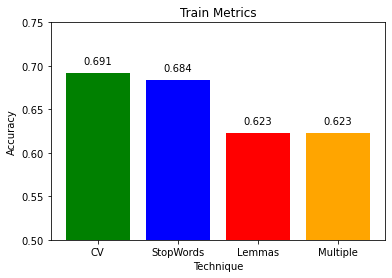

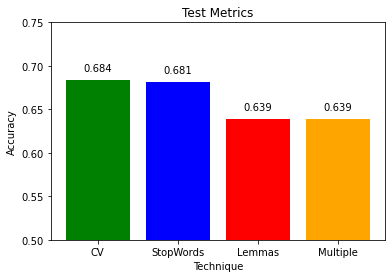

In [15]:
# Celda 5
import matplotlib.pyplot as plt

# Crear gráfica para train
train_metrics = [train_accuracy_cv, train_accuracy_sw, accuracy_train_vect_lemas, accuracy_train_mult]
train_labels = ['CV', 'StopWords', 'Lemmas', 'Multiple']

plt.bar(train_labels, train_metrics, color=['green', 'blue', 'red', 'orange'])
plt.ylim([0.5, 0.75])
plt.title('Train Metrics')
plt.xlabel('Technique')
plt.ylabel('Accuracy')

# Agregar etiquetas de las barras
for i, v in enumerate(train_metrics):
    plt.text(i, v + 0.01, str(round(v, 3)), color='black', ha='center')

plt.show()

# Crear gráfica para test
test_metrics = [test_accuracy_cv, test_accuracy_sw, accuracy_test_vect_lemas, accuracy_test_mult]
test_labels = ['CV', 'StopWords', 'Lemmas', 'Multiple']

plt.bar(test_labels, test_metrics, color=['green', 'blue', 'red', 'orange'])
plt.ylim([0.5, 0.75])
plt.title('Test Metrics')
plt.xlabel('Technique')
plt.ylabel('Accuracy')

# Agregar etiquetas de las barras
for i, v in enumerate(test_metrics):
    plt.text(i, v + 0.01, str(round(v, 3)), color='black', ha='center')

plt.show()

Las gráficas anteriores comparan los resultados de la métrica accuracy para las distintas opciones de modelo, la primera gráfica para los datos de entrenamiento y otra para los de prueba. La primera estimación coresponde al modelo que únicamente usa el "CountVectorizer" como herramienta para generar un vector de representación de los textos, a pesar de ser la opción más simple, tuvo el modelo con el mejor desempeño en cuanto a precisión tanto en train como test. Como ventajas del countvectorizer podríamos argumentar que su relativa simplicidad implica una carga computacional menor que algunos de los otros métodos disponibles. En contraste, el método más complejo, que incluia la combinación de limpieza de stopwords y lemmatización fue la alternativa con el menor desempeño desde la métrica del accuracy. En teoría, al retirar los stopwords enfocamos el modelo en las palabras que realmente le dan el sentido a las frases retirando palabras de uso común. Así mismo, el uso de lematización permite relacionar las palabras con sus raices de acuerdo a su forma base o de diccionario. Las desventaja de los algoritmos de Lematización podría ser su mayor complejidad, lo que podría tener un costo computacional más alto.

De modo que para el ejercicio se obtuvieron resultados contraintuitivos, pues en teoría el modelo que combinaba múltiples métodos debería ser más robusto y tener desempeños superiores al countvectorizer. En este set de datos, la aproximación más directa y con menor procesamiento generó con el mejor desempeño al medirlo con la métrica del accuracy. 